# Business Case : Cycling data from Auckland New Zeeland

Continue with the exercise from lesson 9 (Auckland cycling count prediction). You can continue from the notebooks uploaded by me or your own. 


Your task is to

1) add holidays to your Prophet model and check the effects for the week of Waitangi day 2018

2) calculate the RMSE for the period you visualised, and compare the RMSE to the model without holidays. 

3) answer the following questions:

A) Is there a decrease in RMSE when you add holidays?

B) Give your own interpretation of the fit (did it improve the prediction on waitangi day or not)

C) if it does not work you should investigate why and try to get it to work, or explain why it will not work


You need to upload a clean notebook. You can assume that the data files are in my working directory. Provide the answers to the questions at the bottom of the notebook.

In [288]:
!pip install --upgrade holidays

### Importing Libraries 

In [289]:
import warnings

In [290]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import holidays

import matplotlib.pyplot as plt

# Control how warnings are displayed
warnings.simplefilter("ignore")
import warnings

## Utilities 

In [291]:
def calculate_rmse(forecast, cycling_test):
    # Filter forecast and cycling_test based on date
    predictions = forecast[forecast['ds'] >= '2018']
    predictions['ds'] = pd.to_datetime(predictions['ds'])

    truth = cycling_test
    truth['ds'] = pd.to_datetime(truth['ds'])

    # Merge predicted and true values on the 'ds' column
    merged_df = pd.merge(predictions, truth, on='ds', how='inner', suffixes=('_pred', '_true'))

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(merged_df['y_true'], merged_df['yhat']))

    print(f"Root Mean Squared Error (RMSE): {rmse}")

### Importing cycling data set 

In [292]:
cycling = pd.read_csv('cycling_counts_by_day.csv')
cycling.tail()

,datetime,Tamaki Drive EB
2887,2018-05-27,235.0
2888,2018-05-28,709.0
2889,2018-05-29,859.0
2890,2018-05-30,787.0
2891,2018-05-31,749.0


In [293]:
cycling = cycling.rename(columns = {'datetime': 'ds', 'Tamaki Drive EB': 'y'})

In [294]:
cycling_train = cycling[cycling['ds']<'2018']
cycling_test = cycling[cycling['ds'] >= '2018']

print(cycling_train.head())
print(cycling_test.tail())

           ds      y
0  2010-07-01  570.0
1  2010-07-02  473.0
2  2010-07-03  766.0
3  2010-07-04  240.0
4  2010-07-05  172.0
              ds      y
2887  2018-05-27  235.0
2888  2018-05-28  709.0
2889  2018-05-29  859.0
2890  2018-05-30  787.0
2891  2018-05-31  749.0


In [295]:
cycling_test

,ds,y
2741,2018-01-01,522.0
2742,2018-01-02,1179.0
2743,2018-01-03,1000.0
2744,2018-01-04,231.0
2745,2018-01-05,95.0
...,...,...
2887,2018-05-27,235.0
2888,2018-05-28,709.0
2889,2018-05-29,859.0
2890,2018-05-30,787.0


In [296]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(cycling_train)

11:36:05 - cmdstanpy - INFO - Chain [1] start processing
11:36:05 - cmdstanpy - INFO - Chain [1] done processing


In [297]:
forecast_days = 152
future = m.make_future_dataframe(periods=forecast_days )
future

,ds
0,2010-07-01
1,2010-07-02
2,2010-07-03
3,2010-07-04
4,2010-07-05
...,...
2888,2018-05-28
2889,2018-05-29
2890,2018-05-30
2891,2018-05-31


In [298]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2888,2018-05-28,708.090278,480.449265,954.501001
2889,2018-05-29,811.666433,586.702709,1052.355265
2890,2018-05-30,735.436112,505.880732,978.264566
2891,2018-05-31,721.871626,485.357433,952.393852
2892,2018-06-01,668.158505,447.299028,924.642823


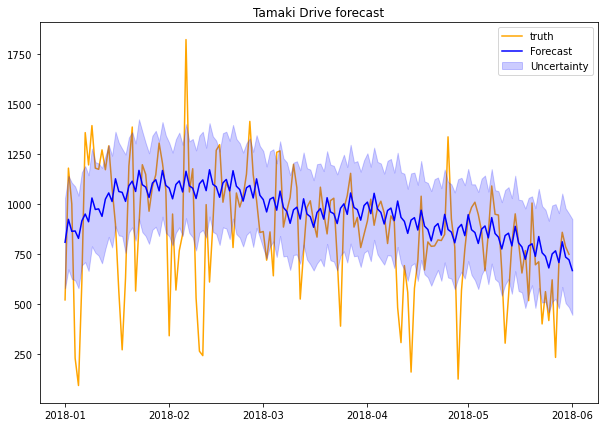

In [299]:
predictions = forecast[forecast['ds']>= '2018' ]
predictions['ds'] = pd.to_datetime(predictions['ds'])

truth = cycling_test
truth['ds'] = pd.to_datetime(truth['ds'])

plt.figure(figsize = (10,7))
plt.plot(truth['ds'], truth['y'], label = 'truth', color = 'orange', zorder = 0)
plt.plot(predictions['ds'], predictions['yhat'], label='Forecast', zorder = 1, color = 'blue')
plt.fill_between(predictions['ds'], predictions['yhat_upper'], predictions['yhat_lower'], alpha=.2, label='Uncertainty', color = 'blue')

#plt.xlim([pd.to_datetime('2018-02-02'), pd.to_datetime('2018-03-02')])

plt.title('Tamaki Drive forecast')
plt.legend()
plt.show()




# Adding weather

In [300]:
weather = pd.read_csv('Rawdata\Auckland_weather_combined.csv', sep = ";")
weather = weather.rename(columns = {'day':'ds'})
weather['ds'] = pd.to_datetime(weather['ds'])
weather

,ds,sun,wind,rain,temp
0,2012-01-01,0.161071,5.578571,0.000000,20.250000
1,2012-01-02,0.295238,10.820000,0.000000,18.400000
2,2012-01-03,0.588095,5.171429,0.028571,19.814286
3,2012-01-04,0.325238,3.778571,0.402381,19.857143
4,2012-01-05,0.595238,3.257143,0.079286,20.478571
...,...,...,...,...,...
2339,2018-05-28,0.604762,3.200000,0.000000,9.200000
2340,2018-05-29,1.459762,2.571429,0.000000,8.385714
2341,2018-05-30,1.359762,2.587500,0.000000,8.335714
2342,2018-05-31,1.483571,2.057143,0.000000,8.957143


In [301]:
cycling_train_weather = cycling_train.copy()
cycling_test_weather = cycling_test.copy()

cycling_train_weather['ds'] = pd.to_datetime(cycling_train_weather['ds'])
cycling_test_weather['ds'] = pd.to_datetime(cycling_test_weather['ds'])

cycling_train_weather = cycling_train_weather.merge(weather, on = 'ds')
cycling_test_weather = cycling_test_weather.merge(weather, on = 'ds')

print(cycling_train_weather.head())
print(cycling_test_weather.head())

          ds      y       sun       wind      rain       temp
0 2012-01-01  792.0  0.161071   5.578571  0.000000  20.250000
1 2012-01-02  500.0  0.295238  10.820000  0.000000  18.400000
2 2012-01-03  711.0  0.588095   5.171429  0.028571  19.814286
3 2012-01-04  852.0  0.325238   3.778571  0.402381  19.857143
4 2012-01-05  820.0  0.595238   3.257143  0.079286  20.478571
          ds       y       sun       wind      rain       temp
0 2018-01-01   522.0  0.054762   3.721429  0.476190  21.642857
1 2018-01-02  1179.0  1.886429   3.635714  0.000000  23.485714
2 2018-01-03  1000.0  1.601429   3.866667  0.035714  23.171429
3 2018-01-04   231.0  0.000000   6.092857  4.983095  21.520000
4 2018-01-05    95.0  0.000000  10.100000  2.285119  19.575000


In [302]:
m = Prophet(seasonality_mode='multiplicative')
m.add_regressor('sun')
m.add_regressor('rain')
m.fit(cycling_train_weather)

11:36:08 - cmdstanpy - INFO - Chain [1] start processing
11:36:08 - cmdstanpy - INFO - Chain [1] done processing


In [303]:
forecast_days = 152
future = m.make_future_dataframe(periods=forecast_days )
future = future.merge(weather, on = 'ds')
future

,ds,sun,wind,rain,temp
0,2012-01-01,0.161071,5.578571,0.000000,20.250000
1,2012-01-02,0.295238,10.820000,0.000000,18.400000
2,2012-01-03,0.588095,5.171429,0.028571,19.814286
3,2012-01-04,0.325238,3.778571,0.402381,19.857143
4,2012-01-05,0.595238,3.257143,0.079286,20.478571
...,...,...,...,...,...
2339,2018-05-28,0.604762,3.200000,0.000000,9.200000
2340,2018-05-29,1.459762,2.571429,0.000000,8.385714
2341,2018-05-30,1.359762,2.587500,0.000000,8.335714
2342,2018-05-31,1.483571,2.057143,0.000000,8.957143


In [304]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2339,2018-05-28,717.629172,547.092245,902.238814
2340,2018-05-29,971.975145,789.455634,1151.281870
2341,2018-05-30,902.321937,735.041263,1077.448749
2342,2018-05-31,899.450491,728.714670,1093.902711
2343,2018-06-01,822.901320,639.837691,1007.456322


## Plot Results

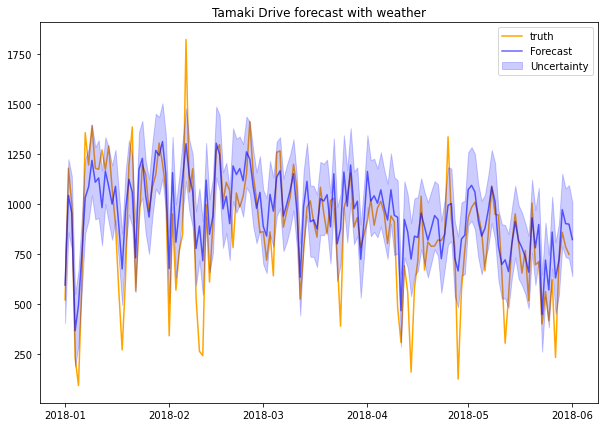

In [305]:
predictions = forecast[forecast['ds']>= '2018' ]
predictions['ds'] = pd.to_datetime(predictions['ds'])

truth = cycling_test
truth['ds'] = pd.to_datetime(truth['ds'])

plt.figure(figsize = (10,7))
plt.plot(truth['ds'], truth['y'], label = 'truth', color = 'orange', zorder = 0)
plt.plot(predictions['ds'], predictions['yhat'], label='Forecast', zorder = 1, color = 'blue', alpha = .6)
plt.fill_between(predictions['ds'], predictions['yhat_upper'], predictions['yhat_lower'], alpha=.2, label='Uncertainty', color = 'blue')

#plt.xlim([pd.to_datetime('2018-02-02'), pd.to_datetime('2018-03-02')])

plt.title('Tamaki Drive forecast with weather')
plt.legend()
plt.show()



### Calculating the RMSE - With weather 

In [308]:
predictions = forecast[forecast['ds'] >= '2018']
predictions['ds'] = pd.to_datetime(predictions['ds'])

truth = cycling_test
truth['ds'] = pd.to_datetime(truth['ds'])

# Merge predicted and true values on the 'ds' column
merged_df = pd.merge(predictions, truth, on='ds', how='inner', suffixes=('_pred', '_true'))

In [309]:
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 195.4605947338803


## Adding holiday

### Load Holiday Data

In [310]:
# Load New Zealand public holidays
nz_holidays = holidays.NewZealand(years=range(2012, 2019))  # Adjust the range as needed

In [311]:
holiday_df = pd.DataFrame({
    'ds': pd.to_datetime(list(nz_holidays.keys())),
    'holiday': list(nz_holidays.values())
}).sort_values(by='ds')

In [312]:
holiday_df.tail()

,ds,holiday
27,2018-04-25,Anzac Day
30,2018-06-04,Queen's Birthday
31,2018-10-22,Labour Day
32,2018-12-25,Christmas Day
33,2018-12-26,Boxing Day


## Merge with Cycling Data

In [313]:
cycling_train_weather_holidays = cycling_train_weather.merge(holiday_df, on='ds', how='left')
cycling_test_weather_holidays = cycling_test_weather.merge(holiday_df, on='ds', how='left')

## Update Prophet Model:

In [314]:
m = Prophet(seasonality_mode='multiplicative')
m.add_regressor('sun')
m.add_regressor('rain')

In [315]:
# Add holidays
m.add_country_holidays(country_name='NZ')  

In [316]:
m.fit(cycling_train_weather_holidays)

11:36:42 - cmdstanpy - INFO - Chain [1] start processing
11:36:42 - cmdstanpy - INFO - Chain [1] done processing


## Generate Forecast with Holidays

In [317]:
forecast_days = 152
future = m.make_future_dataframe(periods=forecast_days)
future = future.merge(weather, on='ds')
future = future.merge(holiday_df, on='ds', how='left')  # Make sure to include holidays in the future dataframe
forecast = m.predict(future)

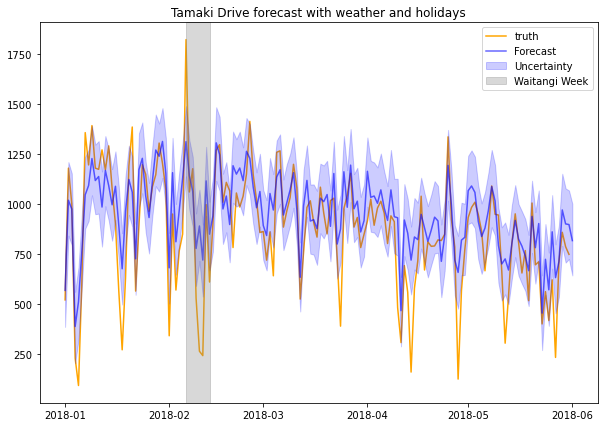

In [318]:
predictions = forecast[forecast['ds'] >= '2018']
predictions['ds'] = pd.to_datetime(predictions['ds'])

truth = cycling_test
truth['ds'] = pd.to_datetime(truth['ds'])

# Merge predicted and true values on the 'ds' column
merged_df = pd.merge(predictions, truth, on='ds', how='inner', suffixes=('_pred', '_true'))

# Extract the week of Waitangi Day 2018
waitangi_week_start = pd.to_datetime('2018-02-06')  # Adjust the start date based on the specific date of Waitangi Day
waitangi_week_end = waitangi_week_start + pd.Timedelta(days=7)

waitangi_week_data = merged_df[(merged_df['ds'] >= waitangi_week_start) & (merged_df['ds'] <= waitangi_week_end)]

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(truth['ds'], truth['y'], label='truth', color='orange', zorder=0)
plt.plot(predictions['ds'], predictions['yhat'], label='Forecast', zorder=1, color='blue', alpha=0.6)
plt.fill_between(predictions['ds'], predictions['yhat_upper'], predictions['yhat_lower'],
                 alpha=0.2, label='Uncertainty', color='blue')

# Highlight the week of Waitangi Day
plt.axvspan(waitangi_week_start, waitangi_week_end, color='gray', alpha=0.3, label='Waitangi Week')

plt.title('Tamaki Drive forecast with weather and holidays')
plt.legend()
plt.show()



### Calculating the RMSE - With Holidays

In [319]:
predictions = forecast[forecast['ds'] >= '2018']
predictions['ds'] = pd.to_datetime(predictions['ds'])

truth = cycling_test
truth['ds'] = pd.to_datetime(truth['ds'])

merged_df = pd.merge(predictions, truth, on='ds', how='inner', suffixes=('_pred', '_true'))

In [320]:
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 193.67911455920358


### Conclusion

A. Is there a decrease in RMSE when you add holidays?

    From the caculation above we see that the RMSE without holidays is 195.46 and the RMSE with holidays is 193.68, therefore there is a slight decrease in the RMSE improving our model slightly, hence better predictions.
    
B) Give your own interpretation of the fit (did it improve the prediction on waitangi day or not)

    After comparing both plot, you can see there was a slight improvement during waitangi day, this was because it is a holidays and after adding the holidays to our model, we realize this improvements. 